##**PURPOSE:** To determine the reason and various factors that are responsible for high cancellation of hotel booking and finding it solution

##Import libraries and dataset

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
df=pd.read_csv(r'/content/hotel_booking.csv')
df


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


In [90]:
df.head(2)
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21,Michael Johnson,Michael.C@gmail.com,669-792-1661,************4923
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461,48,6,1,28


In [91]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

##checking data type,changing datatype,drop unwanted columns and drop null values

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [93]:
df.drop(['name','email','phone-number','credit_card','company','agent'],axis=1,inplace=True)

In [94]:
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [95]:
df.dropna(inplace=True)

In [96]:
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])

In [97]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


##Removing outliers

<Axes: >

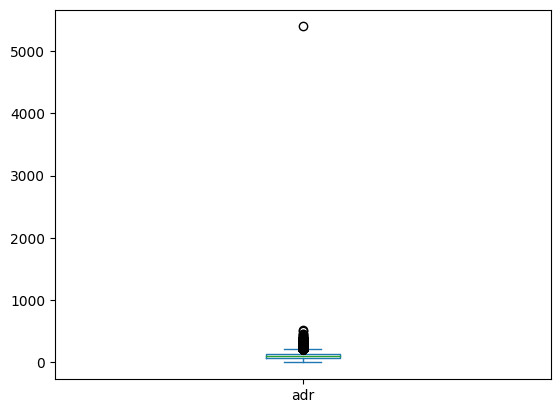

In [98]:
df['adr'].plot(kind='box')

In [99]:
df=df[-(df['adr']>500)]

In [100]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118895 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118895 non-null  object        
 1   is_canceled                     118895 non-null  int64         
 2   lead_time                       118895 non-null  int64         
 3   arrival_date_year               118895 non-null  int64         
 4   arrival_date_month              118895 non-null  object        
 5   arrival_date_week_number        118895 non-null  int64         
 6   arrival_date_day_of_month       118895 non-null  int64         
 7   stays_in_weekend_nights         118895 non-null  int64         
 8   stays_in_week_nights            118895 non-null  int64         
 9   adults                          118895 non-null  int64         
 10  children                        118895 non-null  float64

##creating new columns as per requirement

In [102]:
df['month']=df['reservation_status_date'].dt.month

<ipython-input-102-c8c59cc2b4a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month']=df['reservation_status_date'].dt.month


In [103]:
df['month'].dtypes

dtype('int64')

In [104]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [105]:
df.head(1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,7


##dividing hotels according to its type and checking cancellation ratio

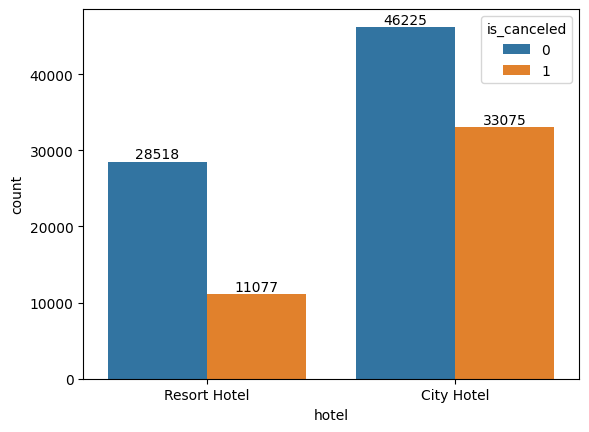

In [106]:
ax=sns.countplot(x='hotel',data=df,hue='is_canceled')
for bars in ax.containers:
  ax.bar_label(bars)


<Axes: xlabel='is_canceled', ylabel='count'>

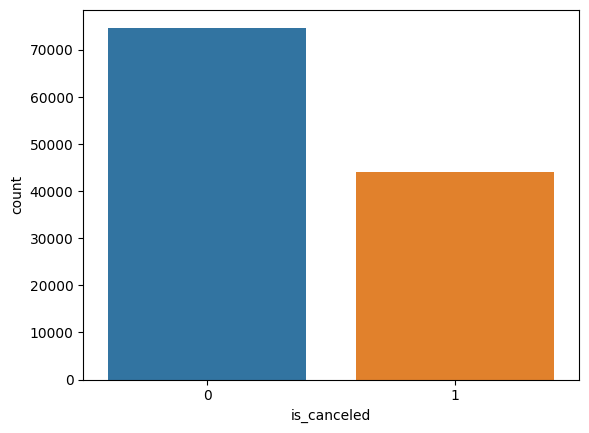

In [107]:
sns.countplot(x='is_canceled',data=df)

##making more division by hotel and its cancellation basis

In [108]:
not_cancel_table=df[df['is_canceled']==0]
cancel_table=df[df['is_canceled']==1]
resort_table=df[df['hotel']=='Resort Hotel']
city_table=df[df['hotel']=='City Hotel']



In [109]:
resort_cancel_table=resort_table[resort_table['is_canceled']==1]
resort_not_cancel_table=resort_table[resort_table['is_canceled']==0]
city_cancel_table=city_table[city_table['is_canceled']==1]
city_not_cancel_table=city_table[city_table['is_canceled']==0]

In [110]:
all_cancel_table=df[df['is_canceled']==1]
all_not_cancel_table=df[df['is_canceled']==0]

In [111]:
rtras=resort_table.groupby(['reservation_status_date'],as_index=False)['adr'].sum()
ctras=city_table.groupby(['reservation_status_date'],as_index=False)['adr'].sum()

In [113]:
actra=all_cancel_table.groupby(['reservation_status_date'],as_index=False)['adr'].mean()

In [114]:
actra

,reservation_status_date,adr
0,2014-10-17,62.800000
1,2014-11-18,0.000000
2,2015-01-01,62.062779
3,2015-01-02,9.633750
4,2015-01-18,0.000000
...,...,...
897,2017-08-26,178.200000
898,2017-08-27,167.300000
899,2017-08-28,81.416667
900,2017-08-29,144.253333


In [115]:
anctra=all_not_cancel_table.groupby(['reservation_status_date'],as_index=False)['adr'].mean()
anctra

,reservation_status_date,adr
0,2015-07-01,31.650000
1,2015-07-02,95.924000
2,2015-07-03,97.645205
3,2015-07-04,110.480000
4,2015-07-05,100.308485
...,...,...
800,2017-09-08,101.012500
801,2017-09-09,147.778333
802,2017-09-10,145.272500
803,2017-09-12,153.570000


## table to show cancellation done due to high price

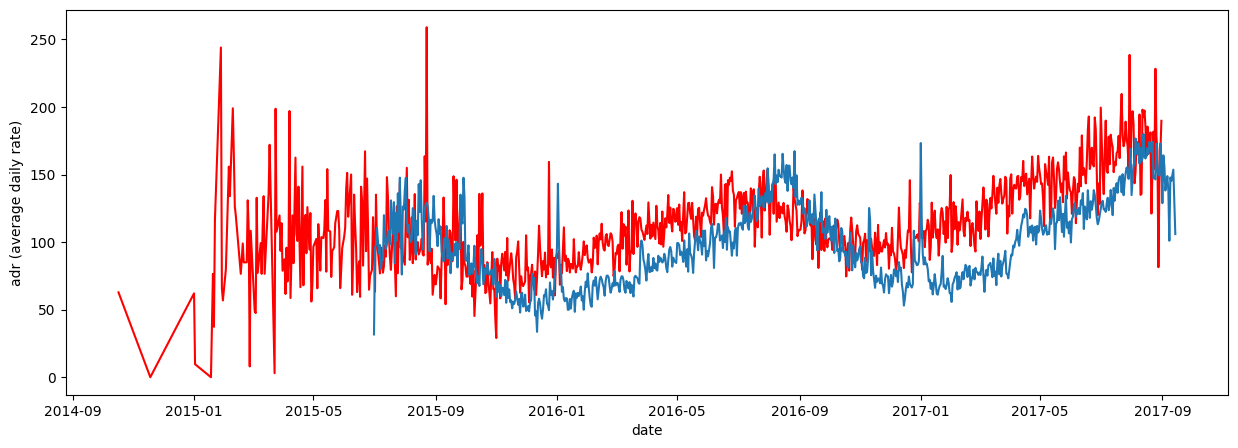

In [135]:
plt.figure(figsize=(15,5))
plt.xlabel('date')
plt.ylabel('adr (average daily rate)')
plt.plot('reservation_status_date','adr',data=actra,color='red')##canceled plot
plt.plot('reservation_status_date','adr',data=anctra)

In [117]:
rctma=resort_cancel_table.groupby(['month'],as_index=False)['adr'].sum()

##determining mothwise demand and cancellation of resort hotel which shows that high price leads to high cancellation

<Axes: title={'center': 'resort cancel price'}, xlabel='month', ylabel='adr'>

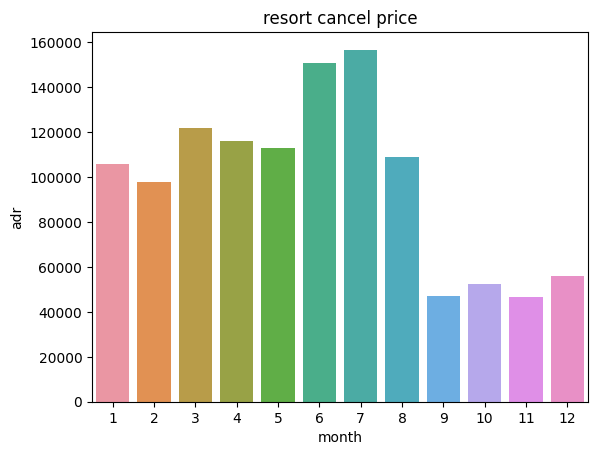

In [118]:
plt.title('resort cancel price')
sns.barplot(x='month',y='adr',data=rctma)

In [119]:
rctmac=resort_cancel_table.groupby(['month'],as_index=False)['adr'].count()

<Axes: title={'center': 'resort cancel count'}, xlabel='month', ylabel='adr'>

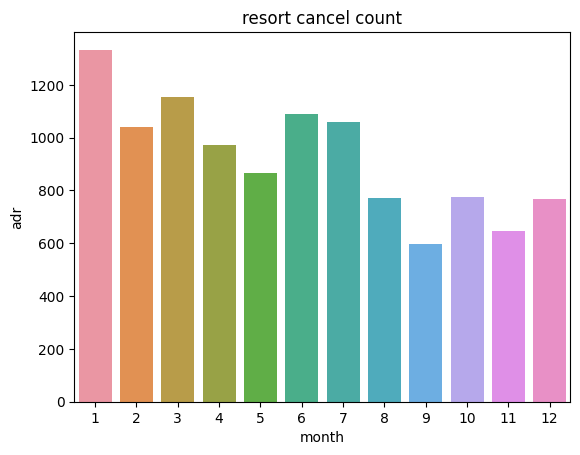

In [120]:
plt.title('resort cancel count')
sns.barplot(x='month',y='adr',data=rctmac)


In [122]:
df['month'].value_counts()

7     12073
8     11223
10    11095
1     10622
5     10293
3     10177
4      9957
2      9435
9      9359
6      9255
11     8052
12     7354
Name: month, dtype: int64

##determining countrywise cancellation which shows that bookings from paraguay have maximum cancellation share





In [123]:
actcdc=all_cancel_table.groupby(['country'],as_index=False)['adr'].count().sort_values(by='adr',ascending=False).head(10)

In [124]:
actcdc

,country,adr
97,PRT,27514
41,GBR,2453
33,ESP,2177
38,FRA,1934
60,ITA,1333
27,DEU,1218
56,IRL,832
16,BRA,830
119,USA,501
9,BEL,474


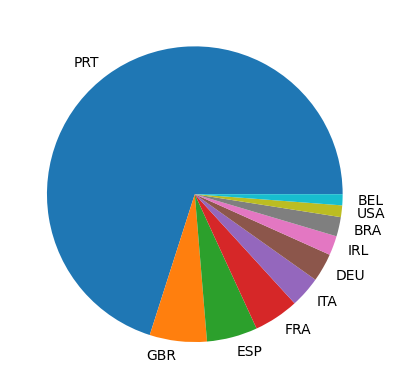

In [125]:
plt.pie(actcdc['adr'],labels=actcdc['country'])
plt.show()

In [126]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'month'],
      dtype='object')

##determining mode of cancelltion which shows that online mode has more booking share nad more cancellation share also

In [127]:
df['market_segment'].value_counts(normalize=True)

Online TA        0.474385
Offline TA/TO    0.203188
Groups           0.166584
Direct           0.104697
Corporate        0.042979
Complementary    0.006174
Aviation         0.001993
Name: market_segment, dtype: float64

In [128]:
all_cancel_table['market_segment'].value_counts(normalize=True)

Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64

In [129]:
dfmic=df.groupby(['month'],as_index=False)['is_canceled'].count()

##**FINAL CONCLUSION:**

1.   Cancellation of resort hotel are high due to it high price and need to give some discounts. In the first half of the year the prices are high and need to reduce it.
2. the booking from paraguay country online booking is extremely high and need find the factor which is responsible and need to be resolve










